**Quadrados Mínimos**
====================

> Presentado por

>> *Nelson Roldan Condori Colquehuanca*

> Disciplina:

>> *Álgebra Linear para Ciencia de Dados*


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.io
from sklearn import linear_model
from sklearn import model_selection
from scipy.optimize import minimize

plt.style.use('fivethirtyeight')

**Função para a descomposição do QR para Quadrados Mínimos**


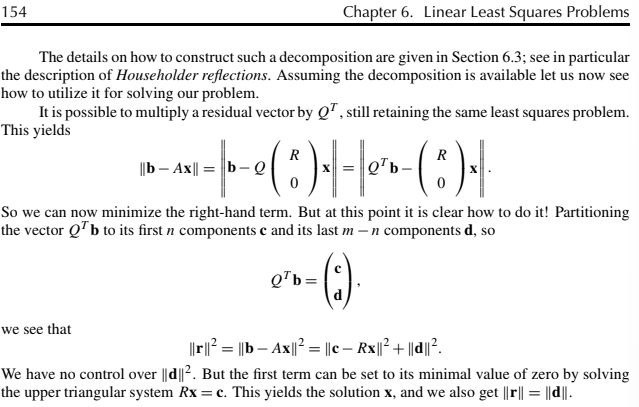

In [10]:
def qr_minimos_cuadrados(A,b):
  Q,R = np.linalg.qr(A,mode='complete')
  # Entonces podemos encontrar
  print("matriz Q",np.matrix(Q))
  mxm=Q.shape
  m=mxm[0]
  print("m=",m)
  print("matriz R",np.matrix(R))
  mxn=R.shape
  n=mxn[1]
  print("n=",n)
  #encontramos el primer termino Q^t *b
  Qt_b = Q.T @  b
  print("matriz Q^t *b",Qt_b)
  n= np.linalg.matrix_rank(R)
  print("rango",n)
  c=Qt_b[:n]
  print("matriz c",c)
  d=Qt_b[n:]
  print("matriz d",d)
  R_T=R[:n,:n]
  print("matriz R^t",R_T)
  x=np.linalg.solve(R_T,c)
  return print("solv.",x)

Testamos o siguiente exemplo,


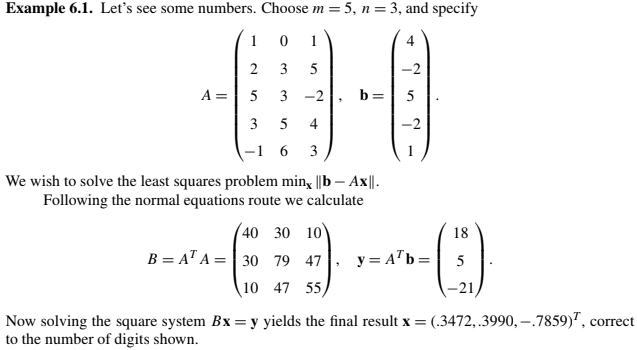

In [11]:
A=np.array([[1,0,1],[2,3,5],[5,3,-2],[3,5,4],[-1, 6, 3]])
b=np.array([4,-2,5,-2,1])
qr_minimos_cuadrados(A,b)

matriz Q [[-0.15811388  0.09977852  0.25545571 -0.30866542  0.89694609]
 [-0.31622777 -0.19955703  0.69185921 -0.47549548 -0.39422312]
 [-0.79056942  0.09977852 -0.54639138 -0.24538503 -0.07928997]
 [-0.47434165 -0.36585456  0.2660997   0.74270133  0.13687997]
 [ 0.15811388 -0.89800664 -0.29448366 -0.25847752  0.12268991]]
m= 5
matriz R [[-6.32455532 -4.74341649 -1.58113883]
 [ 0.         -7.51664819 -5.25500183]
 [ 0.          0.          4.98848231]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]]
n= 3
matriz Q^t *b [-2.84604989  1.13082318 -3.92053553 -3.25447603  3.82871073]
rango 3
matriz c [-2.84604989  1.13082318 -3.92053553]
matriz d [-3.25447603  3.82871073]
matriz R^t [[-6.32455532 -4.74341649 -1.58113883]
 [ 0.         -7.51664819 -5.25500183]
 [ 0.          0.          4.98848231]]
solv. [ 0.34722617  0.39900427 -0.7859175 ]


In [4]:
A2=np.array([[1,0],[1,1],[1,2]])
b2=np.array([0.1,0.9,2.0])
qr_minimos_cuadrados(A2,b2)

matriz Q [[-5.77350269e-01  7.07106781e-01  4.08248290e-01]
 [-5.77350269e-01  5.55111512e-17 -8.16496581e-01]
 [-5.77350269e-01 -7.07106781e-01  4.08248290e-01]]
3
matriz R [[-1.73205081 -1.73205081]
 [ 0.         -1.41421356]
 [ 0.          0.        ]]
2
matriz Q^t *b [-1.73205081 -1.34350288  0.12247449]
rango 2
matriz c [-1.73205081 -1.34350288]
matriz d [0.12247449]
matriz R^t [[-1.73205081 -1.73205081]
 [ 0.         -1.41421356]]
solv. [0.05 0.95]


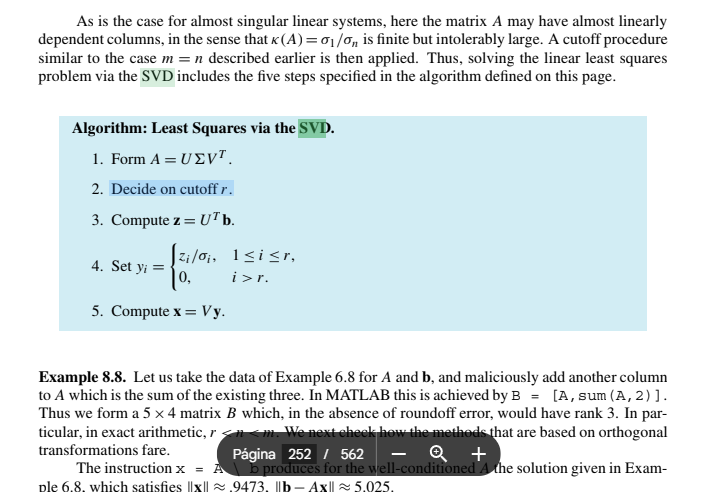

In [9]:
def SVD_minimos_cuadrados(A,b):
  U,S,V=np.linalg.svd(A,full_matrices=False)
  print("Matriz S",S)
  mxn_S=np.shape(S)
  print("mxn",mxn_S)
  print("Matriz V",V)
  mxn_V=np.shape(V)
  print("mxn",mxn_V)
  print("Matriz D",U)
  mxn_U=np.shape(U)
  print("mxn",mxn_U)
  #Decide on cutofF
  r=np.shape(S)
  r=r[0]
  print("valor de r",r)
  z = U.T @ b
  #y = np.zeros(r)
  #for i in range(r):
  #    y[i]= z[i]/S[i]
  #else:
   #   y[i] = 0
  y = z / S
  x = V.T @ y
  print("Solucion",x)
  return x
A=np.array([[1,0,1],[2,3,5],[5,3,-2],[3,5,4],[-1, 6, 3]])
b=np.array([4,-2,5,-2,1])
SVD_minimos_cuadrados(A,b)
#solucion de verdad
m= np.linalg.lstsq(A, b,rcond=None)[0]

print("solucion verdadera",m)


Matriz S [11.22407014  5.95102808  3.55042452]
mxn (3,)
Matriz V [[-0.33109814 -0.76461055 -0.55294189]
 [-0.81001609 -0.07025665  0.58218377]
 [ 0.4839917  -0.64065179  0.596085  ]]
mxn (3, 3)
Matriz D [[-0.07876287 -0.03828453  0.30421058]
 [-0.50968475  0.18150086  0.57076359]
 [-0.253334   -0.91164381 -0.19551659]
 [-0.62616454 -0.07605348  0.17830436]
 [-0.52702725  0.35876616 -0.7153081 ]]
mxn (5, 3)
valor de r 3
Solucion [ 0.34722617  0.39900427 -0.7859175 ]
solucion verdadera [ 0.34722617  0.39900427 -0.7859175 ]


## Exemplos da seção 3.5 (Sparse Regression)

In [13]:
x = np.sort(4*(np.random.rand(25,1)-0.5),axis=0) # Random data from [-2,2]
b = 0.9*x + 0.1*np.random.randn(len(x),1)  # Line y = 0.9x with noise
atrue = np.linalg.lstsq(x,b,rcond=None)[0] # Least-squares slope (no outliers)
atrue = atrue.item(0)

b[-1] = -5.5  # Introduce outlier
acorrupt = np.linalg.lstsq(x,b,rcond=None)[0] # New slope
acorrupt = acorrupt.item(0)

In [14]:
## L1 optimization to reject outlier
def L1_norm(a):
    return np.linalg.norm(a*x-b,ord=1)

a0 = acorrupt   # initialize to L2 solution
res = minimize(L1_norm, a0)
aL1 = res.x[0]  # aL1 is robust

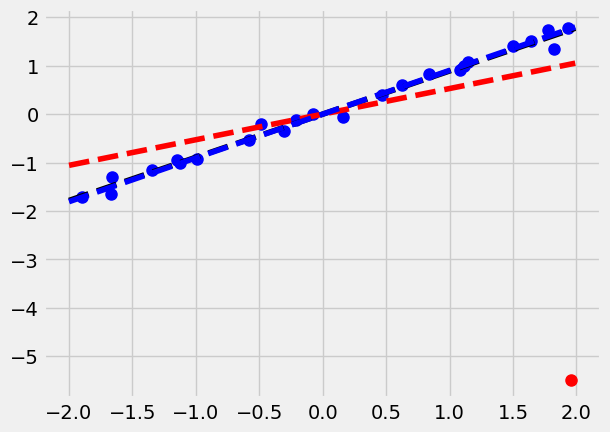

In [15]:
plt.plot(x[:-1],b[:-1],'o',color='b',ms=8) # Data
plt.plot(x[-1],b[-1],'o',color='r',ms=8)   # Outlier

xgrid = np.arange(-2,2,0.01)
plt.plot(xgrid,atrue*xgrid,'--',color='k')    # L2 fit (no outlier)
plt.plot(xgrid,acorrupt*xgrid,'--',color='r') # L2 fit (outlier)
plt.plot(xgrid,aL1*xgrid,'--',color='b')      # L1 fit

plt.show()

In [17]:
A = np.random.randn(100,10) # Matrix of possible predictors
x = np.array([0, 0, 1, 0, 0, 0, -1, 0, 0, 0]) #Two nonzero predictors
b = A @ x + 2*np.random.randn(100)

xL2 = np.linalg.pinv(A) @ b

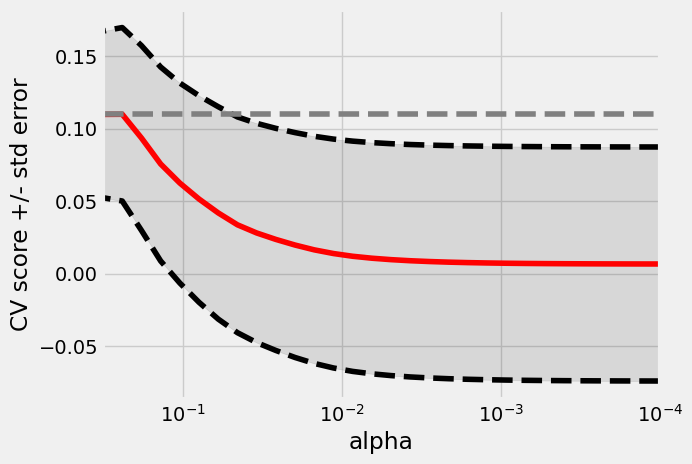

In [18]:
reg = linear_model.LassoCV(cv=10).fit(A, b)

lasso = linear_model.Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]

clf = model_selection.GridSearchCV(lasso, tuned_parameters, cv=10, refit=False)
clf.fit(A, b)

scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.semilogx(alphas, scores,'r-')

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(10)

plt.semilogx(alphas, scores + std_error, 'k--')
plt.semilogx(alphas, scores - std_error, 'k--')
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.1,color='k')

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[-1], alphas[0]])

plt.show()